In [2]:
import os, pathlib, sys
from fnmatch import fnmatch
import re
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

# LIWC vs. Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import liwc
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

---
# LIWC - Linguistic Inquiry and Word Count 
---

In [ ]:
parse, category_names = liwc.load_token_parser('../data/LIWC2007_English100131.dic')

---
# Vader Sentiment
---

In [2]:
# Create an instance of the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# analyzer.polarity_scores(text)
# {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.8393}

# Function to create the sentiment dataframe from Submissions.

# -------------------------------------------------
# Calc Sentiment Scores for each Submission.
# Submissions
# -------------------------------------------------
def create_sentiment_submissions(df, user_base, save_path):
    # new sentiment dataframe 
    columns = ["subreddit", "unique_authors", "author", "selftext", "negative", "neutral", "positive", "compound"]
    sentiment_df = pd.DataFrame(columns=columns)
    for index, row in df.iterrows():
        score = analyzer.polarity_scores(row.selftext)
        new_row = {"subreddit": row.subreddit, "unique_authors": user_base[row.subreddit], "author": row.author, "selftext": row.selftext, "negative": score['neg'], "neutral": score['neu'], "positive": score['pos'], "compound": score['compound']}
        sentiment_df = pd.concat([sentiment_df, pd.DataFrame([new_row])], ignore_index=True)
        sentiment_df.to_csv(save_path)
        # display(sentiment_df.sample())
    return sentiment_df

# -------------------------------------------------
# Calc Avg. Sentiment Scores for each Community.
# Submissions
# -------------------------------------------------
def create_avg_sentiment_submissions(df, save_path):
    list_of_subreddits = list(df.subreddit.unique())
    # new AVG sentiment dataframe 
    columns = ["subreddit", "unique_authors", "avg_negative", "avg_neutral", "avg_positive", "avg_compound", "sentiment"]
    avg_sentiment_df = pd.DataFrame(columns=columns)
    for subreddit in list_of_subreddits:
        # decide sentiment as positive, negative and neutral
        sentiment = ""
        # Average Sentiment Compound per Subreddit.
        sentiment_score = df[df['subreddit'] == subreddit].compound.mean()
        if sentiment_score >= 0.05 :
            sentiment = "Positive"
     
        elif sentiment_score <= - 0.05 :
            sentiment = "Negative"
        else:
            sentiment = "Neutral"
        
        new_row = {"subreddit": subreddit, "unique_authors": df[df['subreddit'] == subreddit].community_size.median(), "avg_negative": df[df['subreddit'] == subreddit].negative.mean(), "avg_neutral": df[df['subreddit'] == subreddit].neutral.mean(), "avg_positive": df[df['subreddit'] == subreddit].positive.mean(), "avg_compound": sentiment_score, "sentiment": sentiment}
        avg_sentiment_df = pd.concat([avg_sentiment_df, pd.DataFrame([new_row])], ignore_index=True)
        avg_sentiment_df.to_json(save_path)
        # display(avg_sentiment_df.sample())
    return avg_sentiment_df

In [7]:
df = pd.read_csv("../../submissions_preprocessed.csv", index_col=0)
df.reset_index(drop=True, inplace=True)
display(df)

,author,created_utc,permalink,selftext,subreddit
0,jrizos,1.314204e+09,/r/addiction/comments/jt0n7/a_family_member_ha...,This person has been using for roughly 10 year...,addiction
1,FlashGameAddict,1.325585e+09,/r/addiction/comments/o0y5w/im_quitting_online...,I'm addicted to online games. Most recently I'...,addiction
2,themarknessmonster,1.327220e+09,/r/addiction/comments/or9wd/is_it_possible_for...,"I think I might be addicted to light, or, more...",addiction
3,jmc726,1.333120e+09,/r/addiction/comments/rl03q/tramodol_abuse_any...,"For anyone not familiar with Tramadol, it's a ...",addiction
4,PetiePal,1.334265e+09,/r/addiction/comments/s6swk/my_friend_is_becom...,Hey guys. I've got a friend who recently came ...,addiction
...,...,...,...,...,...
344071,throw_away_the_panda,1.624366e+09,/r/SelfHate/comments/o5meab/i_genuinely_try_an...,I'm sat at my desk again and I'm unable to kee...,SelfHate
344072,twisted-spirit,1.624496e+09,/r/SelfHate/comments/o6pzta/i_feel_like_i_dont...,"The more I try to make friends, or pretend I'm...",SelfHate
344073,DedKulak1917,1.624593e+09,/r/SelfHate/comments/o7ft41/really_not_a_fan_o...,Recently cheated on my fiancé. We are in the p...,SelfHate
344074,edensrotting,1.624981e+09,/r/SelfHate/comments/oaall2/another_person_her...,"I'm a self destructive person and honestly, i ...",SelfHate


In [ ]:
df[df['subreddit'] == 'AntiPornVideos']

In [ ]:
user_base = df.groupby(by="subreddit")['author'].nunique()
user_base['AdultSelfHarm']

In [ ]:
# Create an instance of the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# analyzer.polarity_scores(text)
# {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.8393}

# Function to create the sentiment dataframe.
def create_sentiment(df):
    # new sentiment dataframe 
    columns = ["subreddit", "community_size", "author", "selftext", "negative", "neutral", "positive", "compound"]
    sentiment_df = pd.DataFrame(columns=columns)
    for index, row in df.iterrows():
        score = analyzer.polarity_scores(row.selftext)
        new_row = {"subreddit": row.subreddit, "community_size": user_base[row.subreddit], "author": row.author, "selftext": row.selftext, "negative": score['neg'], "neutral": score['neu'], "positive": score['pos'], "compound": score['neg']}
        sentiment_df = pd.concat([sentiment_df, pd.DataFrame([new_row])], ignore_index=True)
        # display(sentiment_df.sample())
    return sentiment_df
    


df = pd.read_csv("../../submissions_preprocessed.csv", index_col=0)

sentiment_df = create_sentiment(df)

In [ ]:
sentiment_df.to_json('../data/CommunityInfo.json')


In [ ]:
test = pd.read_json('../data/CommunityInfo.json')
test

---
# Average Information per Community
---

In [3]:
df = pd.read_json('../data/CommunityInfo.json')
df

,subreddit,community_size,author,selftext,negative,neutral,positive,compound
0,addiction,3954,jrizos,This person has been using for roughly 10 year...,0.058,0.792,0.150,0.9604
1,addiction,3954,FlashGameAddict,I'm addicted to online games. Most recently I'...,0.129,0.741,0.131,0.0233
2,addiction,3954,themarknessmonster,"I think I might be addicted to light, or, more...",0.047,0.917,0.036,-0.4767
3,addiction,3954,jmc726,"For anyone not familiar with Tramadol, it's a ...",0.104,0.825,0.071,-0.9555
4,addiction,3954,PetiePal,Hey guys. I've got a friend who recently came ...,0.187,0.743,0.070,-0.9978
...,...,...,...,...,...,...,...,...
344071,SelfHate,356,throw_away_the_panda,I'm sat at my desk again and I'm unable to kee...,0.225,0.724,0.050,-0.9858
344072,SelfHate,356,twisted-spirit,"The more I try to make friends, or pretend I'm...",0.117,0.718,0.164,0.8337
344073,SelfHate,356,DedKulak1917,Recently cheated on my fiancé. We are in the p...,0.158,0.695,0.147,-0.4198
344074,SelfHate,356,edensrotting,"I'm a self destructive person and honestly, i ...",0.242,0.535,0.223,-0.7457


In [4]:
save_path = "../data/avg_community_sentiment.json"
avg_sentiment_df = create_avg_sentiment_submissions(df, save_path)

display(avg_sentiment_df)

,subreddit,unique_authors,avg_negative,avg_neutral,avg_positive,avg_compound,sentiment
0,addiction,3954.0,0.107550,0.767491,0.124959,0.057478,Positive
1,SMARTRecovery,87.0,0.070488,0.766888,0.162680,0.458270,Positive
2,AtheistTwelveSteppers,86.0,0.046739,0.825306,0.128000,0.478459,Positive
3,secularsobriety,31.0,0.068878,0.784829,0.146293,0.342949,Positive
4,recovery,601.0,0.094130,0.764974,0.140923,0.235740,Positive
...,...,...,...,...,...,...,...
83,MMFB,2849.0,0.140617,0.735199,0.124187,-0.158414,Negative
84,bulimia,1524.0,0.126585,0.759874,0.113079,-0.103977,Negative
85,BodyDysmorphia,1688.0,0.138453,0.732403,0.129150,-0.069987,Negative
86,BodyAcceptance,624.0,0.106830,0.747341,0.145825,0.272045,Positive


In [34]:
df = pd.read_json("../data/avg_community_sentiment.json")
pd.set_option('display.max_rows', None)
# df.style.background_gradient(axis=0, gmap=df['avg_compound'], cmap='YlOrRd')

# Custom colormap from dark red (-1) to light yellow (1)
from matplotlib.colors import LinearSegmentedColormap
import dataframe_image as dfi

cmap = LinearSegmentedColormap.from_list('custom_cmap', ['darkred', 'yellow'])
df = df.sort_values(by='avg_compound', ascending=False)
df.reset_index(drop=True, inplace=True)
# Apply the background gradient
styled_df = df.style.background_gradient(gmap=df['avg_compound'], cmap=cmap)

dfi.export(styled_df, '../../Sentiment.png')
styled_df

,subreddit,unique_authors,avg_negative,avg_neutral,avg_positive,avg_compound,sentiment
0,AntiPornVideos,1,0.000000,0.763000,0.237000,0.983200,Positive
1,digitalminimalism,168,0.048192,0.828424,0.123395,0.558897,Positive
2,recoverywithoutAA,80,0.054839,0.801381,0.143788,0.539368,Positive
3,buddhistrecovery,25,0.048064,0.818511,0.133447,0.504653,Positive
4,AtheistTwelveSteppers,86,0.046739,0.825306,0.128000,0.478459,Positive
5,SMARTRecovery,87,0.070488,0.766888,0.162680,0.458270,Positive
6,StopGaming,3213,0.084323,0.769682,0.145627,0.433095,Positive
7,slaa,120,0.076459,0.779842,0.143727,0.397545,Positive
8,Petioles,2269,0.079724,0.787538,0.132743,0.375907,Positive
9,cutdowndrinking,160,0.083123,0.788881,0.127963,0.364473,Positive


AttributeError: 'Styler' object has no attribute 'iloc'

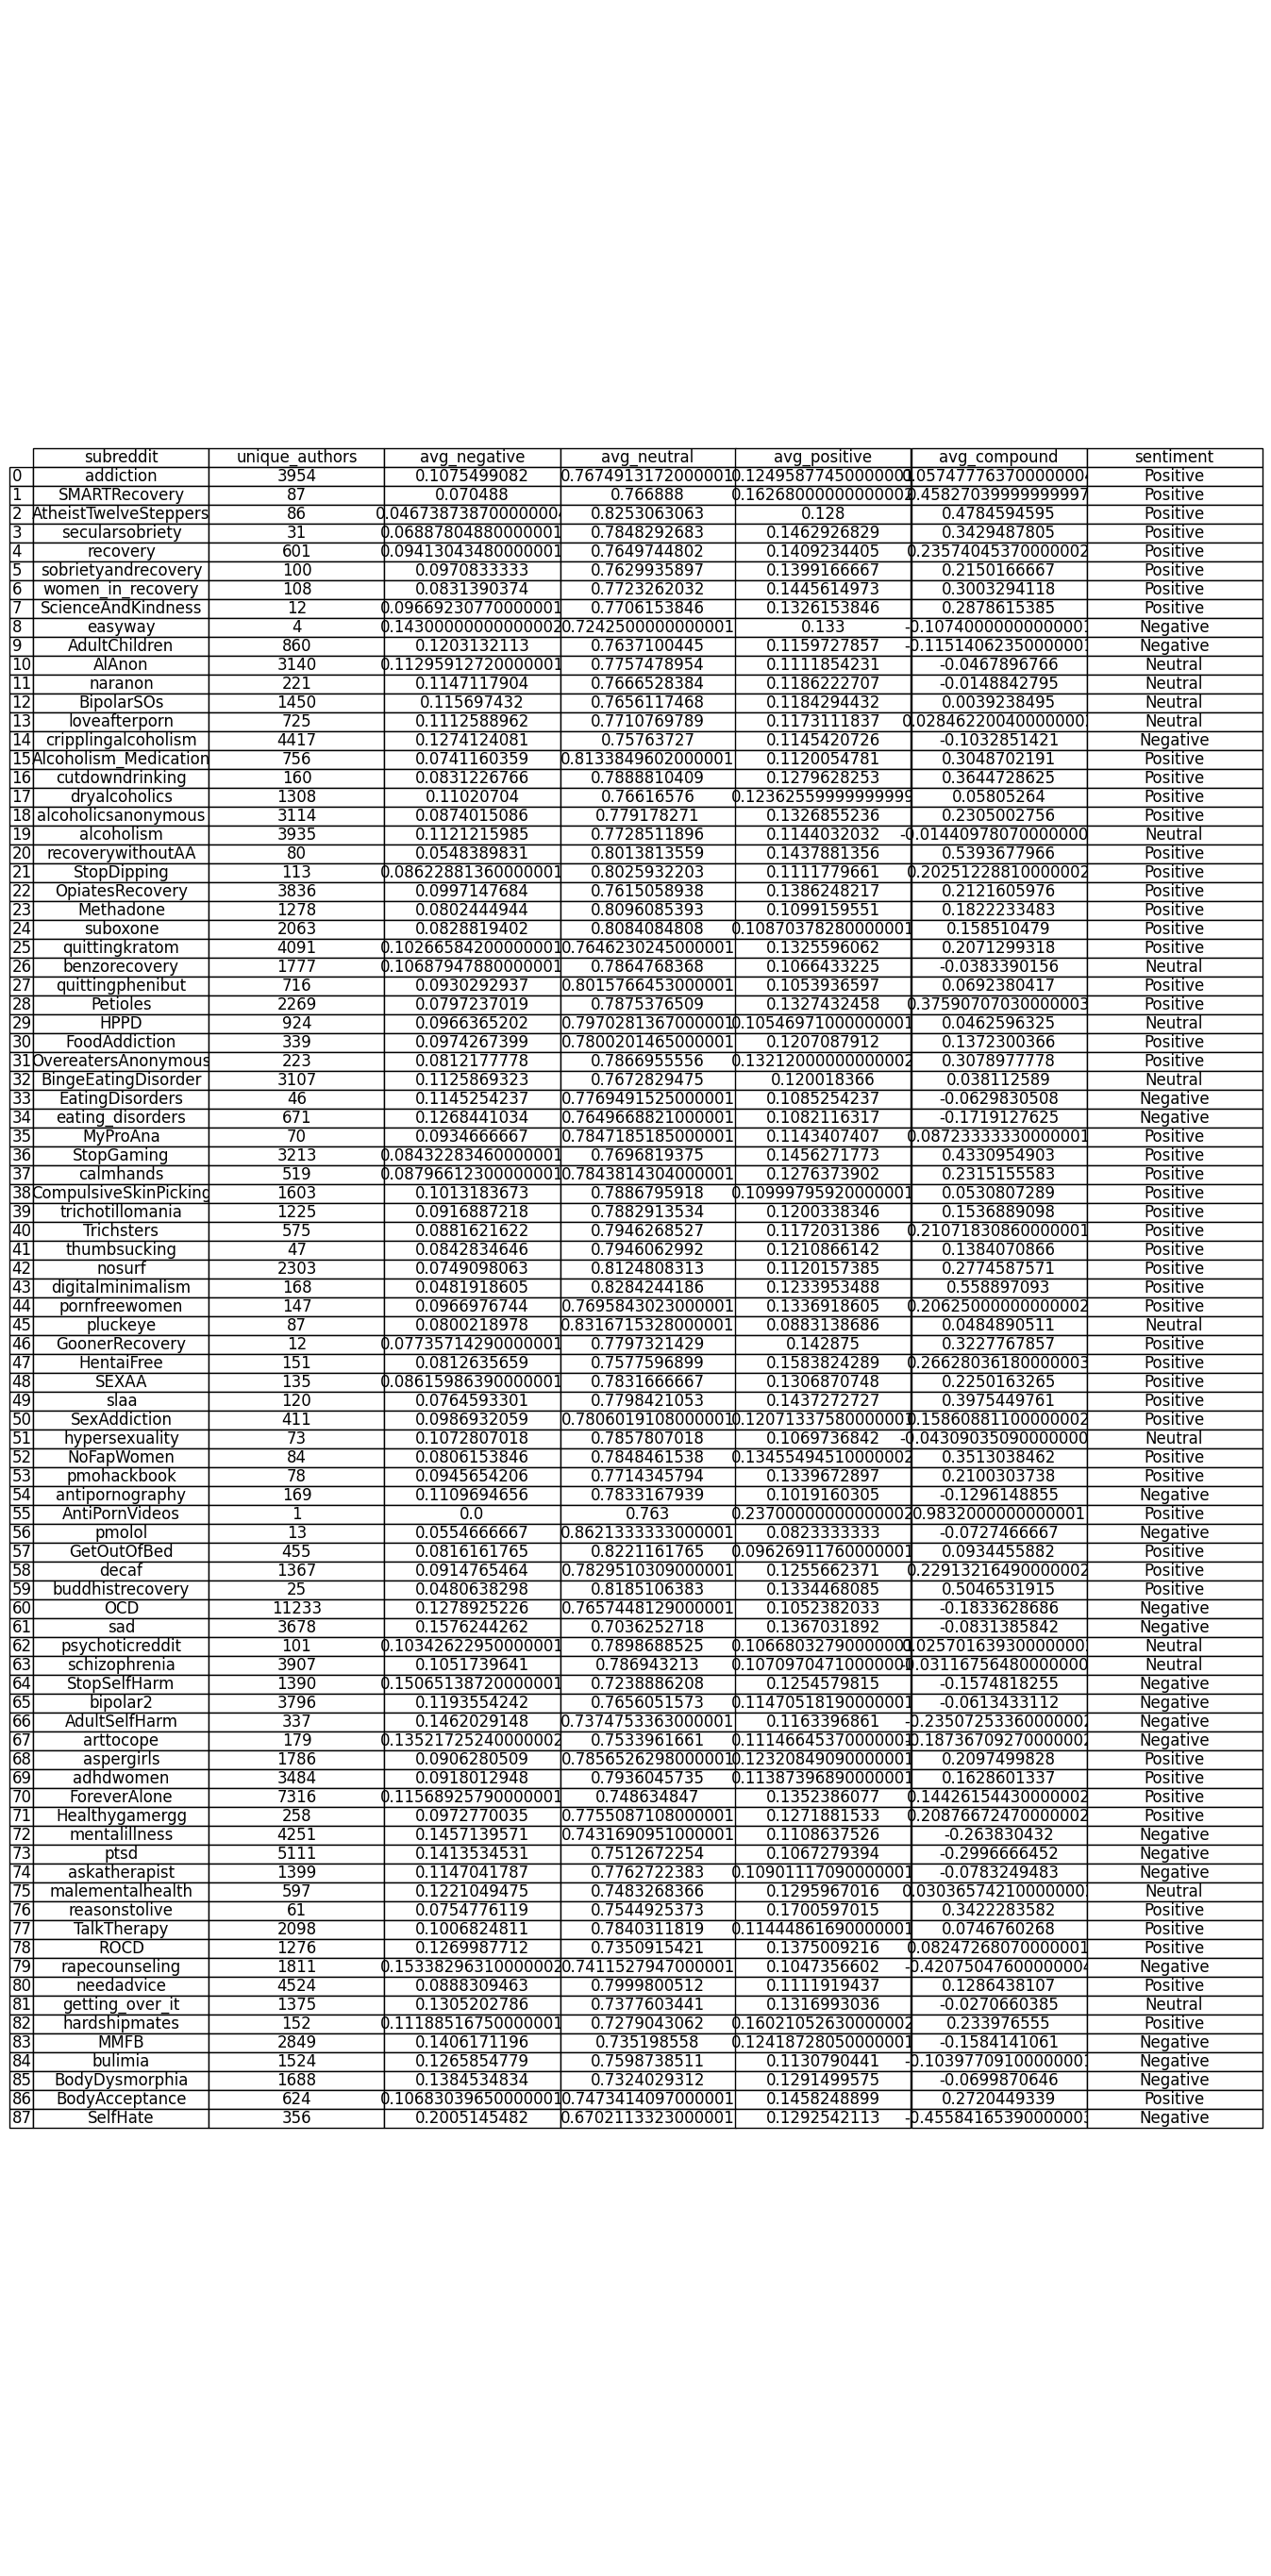

In [26]:
import matplotlib.pyplot as plt
from pandas.plotting import table

def save_dataframe_as_png(styler, filename):
    # Extract the DataFrame from the Styler
    df = styler.data
    
    # Apply background color to the DataFrame
    styled_df = styler.background_gradient(cmap='YlOrRd')

    # Set the figure size
    fig, ax = plt.subplots(figsize=(10, len(df) * 0.4))  # Adjust the size as needed

    # Hide the axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create the table and add it to the plot
    tab = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))

    # Apply the same styling to the table
    tab.auto_set_font_size(False)
    tab.set_fontsize(12)
    tab.scale(1.2, 1.2)
    for i in range(len(df)):
        for j in range(len(df.columns)):
            cell_color = styled_df.iloc[i, j]
            tab[(i, j)].set_facecolor(cell_color)

    # Save the plot as a PNG file
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close()


# Save DataFrame as PNG
save_dataframe_as_png(styled_df, '../../Sentiment.png')